# Sentiment Analysis of Twitter data


---

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('https://github.com/ammarasmro/chatbot-sentiment-analyzer/raw/master/data/train.csv', sep=',',
                  encoding ="ISO-8859-1")

In [26]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [24]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f286c4ffe10>]],
      dtype=object)

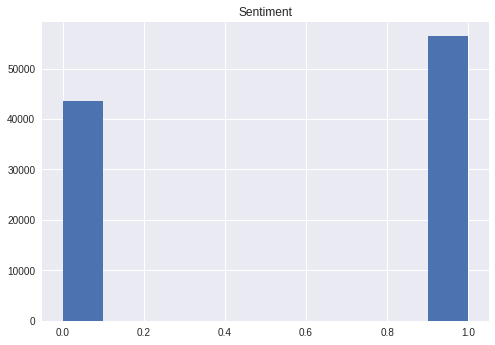

In [25]:
df.hist('Sentiment')

In [0]:
import re

In [0]:
df['SentimentText'] = df['SentimentText'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x.lower().strip()))

In [45]:
df['SentimentText'][:10]

0                          is so sad for my apl friend
1                        i missed the new moon trailer
2                              omg its already 7 30  o
3    omgaga  im sooo  im gunna cry  i ve been at th...
4         i think mi bf is cheating on me          t t
5                             or i just worry too much
6                     juuuuuuuuuuuuuuuuussssst chillin
7    sunny again        work tomorrow            tv...
8      handed in my uniform today   i miss you already
9                 hmmmm     i wonder how she my number
Name: SentimentText, dtype: object

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk.tokenize import word_tokenize

In [0]:
sentiment_text_series = pd.Series(df['SentimentText'])

In [48]:
sentiment_text_series.describe()

count      99989
unique     99836
top       4aplin
freq          13
Name: SentimentText, dtype: object

In [49]:
sentiment_text_series.head()

0                          is so sad for my apl friend
1                        i missed the new moon trailer
2                              omg its already 7 30  o
3    omgaga  im sooo  im gunna cry  i ve been at th...
4         i think mi bf is cheating on me          t t
Name: SentimentText, dtype: object

In [0]:
tokenized_sentiment_text = sentiment_text_series.apply(lambda x: word_tokenize(x))

In [55]:
vocabulary = set()
for tweet in tokenized_sentiment_text:
  for word in tweet:
    vocabulary.add(word)
vocabulary = list(sorted(vocabulary))
print(len(vocabulary))

102525


In [66]:
vocabulary[73220: 73240]

['lova',
 'lovable',
 'lovato',
 'love',
 'loveable',
 'lovealwayswins',
 'loveandemulsion',
 'loveandgluttony',
 'loveavle',
 'lovebug',
 'lovebuggsss',
 'loved',
 'lovedd',
 'loveddddd',
 'lovee',
 'loveed',
 'loveee',
 'loveeee',
 'loveeeee',
 'loveeeeeee']

In [0]:
from collections import Counter

In [0]:
total_counter = Counter()

In [0]:
for tweet in tokenized_sentiment_text:
  total_counter.update(tweet)
  

In [104]:
vocab_short = []
for i in total_counter.most_common():
  if total_counter[i[0]] > 1:
    vocab_short.append(i[0])
print(len(vocab_short))
print(vocab_short[:10])

34993
['i', 'you', 'the', 'to', 'a', 'it', 'and', 'my', 'that', 'for']


In [0]:
word2id = {}
for i in range(len(vocab_short)):
  word2id[vocab_short[i]] = i + 1

In [0]:
id2word = {id: word for word, id in word2id.items()}

In [120]:
id_tweets = []
for tweet in tokenized_sentiment_text:
  twt = []
  for word in tweet: 
    if word in word2id:
      twt.append(word2id[word])
    else: twt.append(0)
  id_tweets.append(twt)
#   id_tweets.append([word2id[word] for word in tweet if word in word2id])
print(len(id_tweets))
print(id_tweets[7])

99989
[855, 142, 80, 164, 489, 181]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    np.array(id_tweets), np.array(df['Sentiment']), test_size=0.33, random_state=42)

In [128]:
X_train[7]

[29736, 1092, 894, 137, 1288, 15, 461, 5, 308, 268, 1280, 164, 7, 1, 22, 1336]

In [131]:
max_len = 0
for i in X_train:
  max_len = max(max_len, len(i))
print(max_len)

155


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

In [0]:
vocabulary_size = len(vocab_short) + 1

In [140]:
# TODO: Design your model
embedding_size = 32
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           1119808   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,173,109
Trainable params: 1,173,109
Non-trainable params: 0
_________________________________________________________________
None


In [191]:
# TODO: Design your model
embedding_size = 128
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          4479232   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 4,570,933
Trainable params: 4,570,933
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
# TODO: Specify training parameters: batch size and number of epochs
batch_size = 64
num_epochs = 3

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]  # first batch_size samples
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]  # rest for training

# TODO: Train your model
model.fit(X_train2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

Train on 66928 samples, validate on 64 samples
Epoch 1/3
44992/66928 [===================>..........] - ETA: 2:48 - loss: 0.5296 - acc: 0.7350

66928/66928 [==============================] - 515s 8ms/step - loss: 0.5121 - acc: 0.7468 - val_loss: 0.6546 - val_acc: 0.7031
Epoch 2/3
20352/66928 [========>.....................] - ETA: 5:56 - loss: 0.3777 - acc: 0.8324

66928/66928 [==============================] - 515s 8ms/step - loss: 0.3895 - acc: 0.8250 - val_loss: 0.6789 - val_acc: 0.7344
Epoch 3/3
10944/66928 [===>..........................] - ETA: 7:12 - loss: 0.2710 - acc: 0.8886

66928/66928 [==============================] - 524s 8ms/step - loss: 0.2969 - acc: 0.8738 - val_loss: 0.7862 - val_acc: 0.7031


In [0]:
# TODO: Specify training parameters: batch size and number of epochs
batch_size = 64
num_epochs = 3

# TODO(optional): Reserve/specify some training data for validation (not to be used for training)
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]  # first batch_size samples
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]  # rest for training

# TODO: Train your model
model.fit(X_train2, y_train2,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

Train on 66928 samples, validate on 64 samples
Epoch 1/3
44992/66928 [===================>..........] - ETA: 2:50 - loss: 0.5304 - acc: 0.7322

66928/66928 [==============================] - 520s 8ms/step - loss: 0.5159 - acc: 0.7436 - val_loss: 0.6991 - val_acc: 0.6875
Epoch 2/3
20352/66928 [========>.....................] - ETA: 6:00 - loss: 0.3964 - acc: 0.8226

66928/66928 [==============================] - 517s 8ms/step - loss: 0.4056 - acc: 0.8163 - val_loss: 0.6937 - val_acc: 0.7031
Epoch 3/3
10304/66928 [===>..........................] - ETA: 7:16 - loss: 0.3160 - acc: 0.8692

In [0]:
import os
cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

In [0]:

# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "rnn_model.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

# Later you can load it using keras.models.load_model()
#from keras.models import load_model
#model = load_model(os.path.join(cache_dir, model_file))

In [0]:
from google.colab import files

In [0]:
model.save('rnn_model.h5')
4/AACRrDjr2Oo0Z4xbaHMO56NvDF1a-TVItk3cj22kJD5nw6r7sWEgwQE

In [0]:
!pip install -U -q PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

In [0]:
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
  }
  media = MediaFileUpload(path, 
                    mimetype='application/octet-stream',
                    resumable=True)

  created = drive_service.files().create(body=file_metadata,
                               media_body=media,
                               fields='id').execute()

  print('File ID: {}'.format(created.get('id')))

  return created

In [257]:
save_file_to_drive('rnn_model.h5', 'rnn_model.h5')

File ID: 1hxIOWDNgRMm7JZbuYtc3sYjObYIvD0OR


{'id': '1hxIOWDNgRMm7JZbuYtc3sYjObYIvD0OR'}

In [265]:
!ls -l

total 53608
drwxr-xr-x 3 root root     4096 May 14 05:53 cache
drwxr-xr-x 1 root root     4096 May 14 08:57 datalab
-rw-r--r-- 1 root root       12 May 14 08:36 example.txt
drwxr-xr-x 3 root root     4096 May 14 03:58 nltk_data
-rw-r--r-- 1 root root 54877944 May 14 08:36 rnn_model.h5


In [0]:
f=open("word2id.txt", "a+")

In [0]:
for i, v in word2id.items():
  f.write('{} {}\n'.format(i, v))

In [0]:
f.close()

In [0]:
!rm word2id.txt

In [0]:
files.download('word2id.txt')

In [196]:
# Evaluate your model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.7616146922456527


In [0]:
result = model.predict(X_test[:1])

In [225]:
result

array([[0.04955456]], dtype=float32)